In [55]:
!pip install humanize

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px
import humanize

In [2]:
df = pd.read_csv('Desktop/Learning Folder/python/Diwali Sales Data.csv', encoding='unicode_escape')
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [3]:
df.shape

(11251, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
# dropping null columns:
df= df.drop(columns=['Status','unnamed1'], axis=1)
print("FIX APPLIED")
print("CHECK:",df.columns)

FIX APPLIED
CHECK: Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


In [6]:
# cleaning column headers: 
df.rename(columns={'Age Group':'Age_Group'}, inplace=True)
df.rename(columns= {'Cust_name': 'Cust_Name'}, inplace=True)
print("FIX APPLIED")
print("CHECK:", df.columns)

FIX APPLIED
CHECK: Index(['User_ID', 'Cust_Name', 'Product_ID', 'Gender', 'Age_Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')


In [7]:
# data cleaning: 
df['Gender'] = (
    df['Gender']
    .str.replace('F','Female')
    .replace('M','Male'))
df['Marital_Status'] = (
    df['Marital_Status']
    .astype(str)
    .replace({'0': 'Unmarried', '1': 'Married'})
)
print("FIX APPLIED")

FIX APPLIED


In [8]:
df.describe(include='all').round(2)

,User_ID,Cust_Name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
count,11251.00,11251,11251,11251,11251,11251.00,11251,11251,11251,11251,11251,11251.00,11239.00
unique,NaN,1250,2351,2,7,NaN,2,16,5,15,18,NaN,NaN
top,NaN,Vishakha,P00265242,Female,26-35,NaN,Unmarried,Uttar Pradesh,Central,IT Sector,Clothing & Apparel,NaN,NaN
freq,NaN,42,53,7842,4543,NaN,6522,1946,4296,1588,2655,NaN,NaN
mean,1003004.49,NaN,NaN,NaN,NaN,35.42,NaN,NaN,NaN,NaN,NaN,2.49,9453.61
std,1716.13,NaN,NaN,NaN,NaN,12.75,NaN,NaN,NaN,NaN,NaN,1.12,5222.36
min,1000001.00,NaN,NaN,NaN,NaN,12.00,NaN,NaN,NaN,NaN,NaN,1.00,188.00
25%,1001492.00,NaN,NaN,NaN,NaN,27.00,NaN,NaN,NaN,NaN,NaN,1.50,5443.00
50%,1003065.00,NaN,NaN,NaN,NaN,33.00,NaN,NaN,NaN,NaN,NaN,2.00,8109.00
75%,1004430.00,NaN,NaN,NaN,NaN,43.00,NaN,NaN,NaN,NaN,NaN,3.00,12675.00


In [9]:
df.head(3)

,User_ID,Cust_Name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0


In [10]:
# Convert Amount to numeric, turning errors into NaN
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

# flling mean in null values:
df['Amount']= df['Amount'].fillna(df['Amount'].mean())

print("FIX APPLIED")
print('Null count:', df['Amount'].isna().sum())

FIX APPLIED
Null count: 0


In [11]:
print("cleaned data ready for analysis", df.head(3))

cleaned data ready for analysis    User_ID  Cust_Name Product_ID  Gender Age_Group  Age Marital_Status  \
0  1002903  Sanskriti  P00125942  Female     26-35   28      Unmarried   
1  1000732     Kartik  P00110942  Female     26-35   35        Married   
2  1001990      Bindu  P00118542  Female     26-35   35        Married   

            State      Zone  Occupation Product_Category  Orders   Amount  
0     Maharashtra   Western  Healthcare             Auto       1  23952.0  
1  Andhra Pradesh  Southern        Govt             Auto       3  23934.0  
2   Uttar Pradesh   Central  Automobile             Auto       3  23924.0  


# Exploratory Data Analysis

In [12]:
# basic descriptive statistics:
df.describe().round(2)

,User_ID,Age,Orders,Amount
count,11251.00,11251.00,11251.00,11251.00
mean,1003004.49,35.42,2.49,9453.61
std,1716.13,12.75,1.12,5219.57
min,1000001.00,12.00,1.00,188.00
25%,1001492.00,27.00,1.50,5443.50
50%,1003065.00,33.00,2.00,8110.00
75%,1004430.00,43.00,3.00,12671.00
max,1006040.00,92.00,4.00,23952.00


### Customer Expereince Analysis:

In [13]:
df.head(5)

,User_ID,Cust_Name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


## KPI's

In [14]:
# Number of unique customers:
n_unique_customers= df['User_ID'].nunique()
print(f"Unique customers:", n_unique_customers)

# Total orders:
total_orders = df['Orders'].sum()
print(f"Total orders:", total_orders)

# Average order value:
avg_order_value = df['Amount'].sum() / total_orders
print(F"Avg Order Value: ${avg_order_value:.2f}")

# Average spend per customer:
avg_spend = df['Amount'].mean()
print(F"Avg spend per customer: ${avg_spend:.2f}")

# Total sales:
total_sales = df['Amount'].sum()
print(f"Total sales: ${humanize.intword(total_sales)}")

# Avg age of customers: 
avg_age= df['Age'].mean()
print(f"Avg age of customers: {avg_age:.0f}")

Unique customers: 3755
Total orders: 28007
Avg Order Value: $3797.71
Avg spend per customer: $9453.61
Total sales: $106.4 million
Avg age of customers: 35


## Analysis and visualization:

Gender
Female    9491.25
Male      9367.02
Name: Amount, dtype: float64


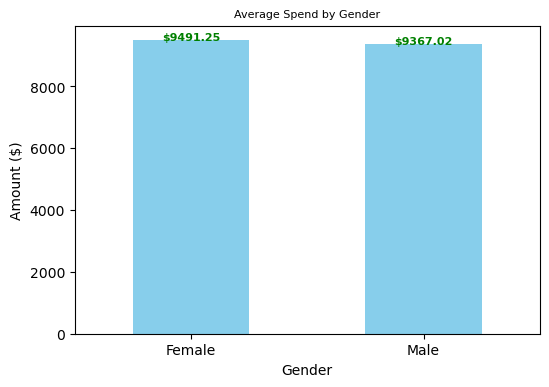

In [15]:
# average spend by gender:
gender_spend = df.groupby('Gender')['Amount'].mean().round(2)
print(gender_spend)

# bar chart:
ax = gender_spend.plot(kind='bar', figsize=(6, 4), color='skyblue')

for i, v in enumerate(gender_spend):
    ax.text(i, v + 1, f"${v}", ha='center', fontweight='bold', color= 'green', fontsize=8) # data labels

plt.title('Average Spend by Gender', fontsize=8)
plt.ylabel('Amount ($)')
plt.xticks(rotation=0)
plt.show()

Age_Group
0-17     9120.45
18-25    9175.48
26-35    9384.18
36-45    9699.63
46-50    9367.44
51-55    9952.38
55+      9557.10
Name: Amount, dtype: float64


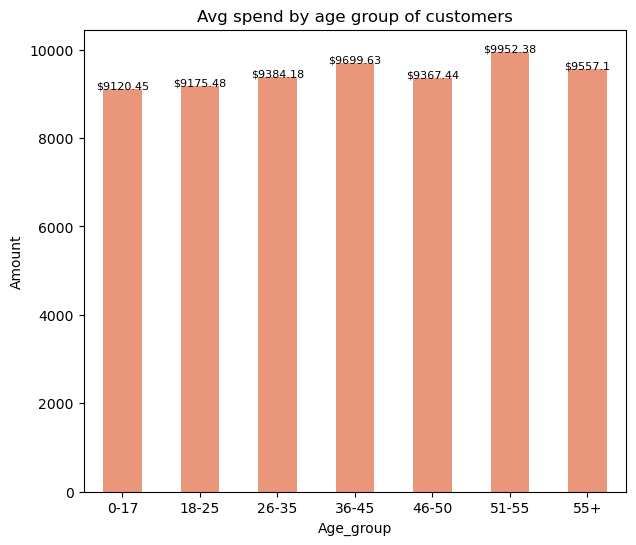

In [16]:
# Avg Spend by age_group: 
age_group_spend= df.groupby('Age_Group')['Amount'].mean().round(2)
print(age_group_spend)

# Bar chart:
agx= age_group_spend.plot(kind='bar', figsize= (7,6), color = 'darksalmon')

for i, v in enumerate(age_group_spend):
    agx.text(i, v + 1, f"${v}", ha='center', fontsize=8, color= 'black', rotation=0) # data labels

plt.title("Avg spend by age group of customers", fontsize=12)
plt.xlabel("Age_group")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.show()

Marital_Status
Married      11749
Unmarried    16258
Name: Orders, dtype: int64


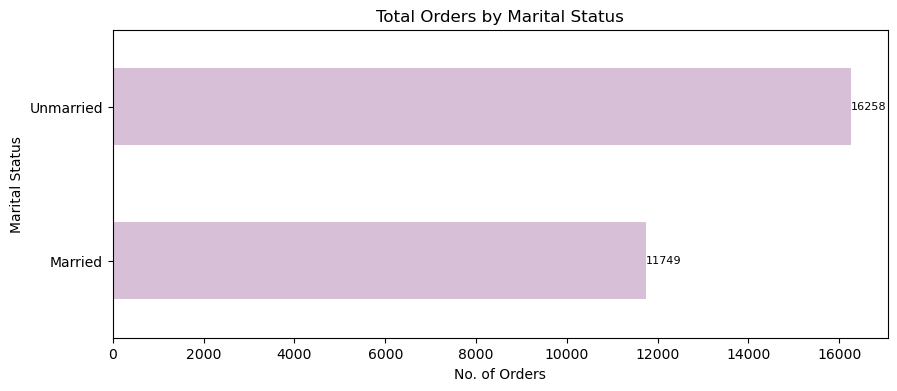

In [17]:
# Total orders by marital status:
marital_status_orders = df.groupby('Marital_Status')['Orders'].sum()
print(marital_status_orders)

#visual:
ax = marital_status_orders.plot(kind='barh',figsize=(10,4),color='thistle')

ax.bar_label(ax.containers[0], fontsize=8, rotation=0) #data label

plt.title("Total Orders by Marital Status", fontsize=12)
plt.xlabel("No. of Orders")
plt.ylabel("Marital Status")
plt.show()

Total amount spend by occupation of customers:
Occupation
IT Sector          14.8 million
Healthcare         13.0 million
Aviation           12.6 million
Banking            10.8 million
Govt                8.5 million
Hospitality         6.4 million
Media               6.3 million
Automobile          5.4 million
Chemical            5.3 million
Lawyer              5.0 million
Retail              4.8 million
Food Processing     4.1 million
Construction        3.6 million
Textile             3.2 million
Agriculture         2.6 million
Name: Amount, dtype: object


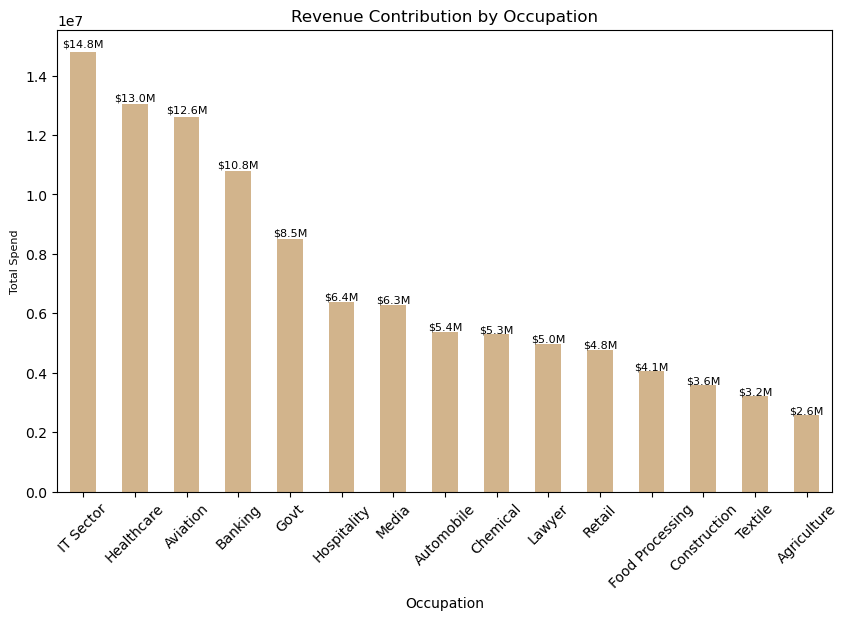

In [18]:
# total spent by occupational status of customers : 
occupational_spent= df.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).round(2)

# Apply humanize to each row individually
occupation_formatted_output = occupational_spent.apply(lambda x: humanize.intword(int(x)))
print("Total amount spend by occupation of customers:")
print(occupation_formatted_output)

# visual:
ax = occupational_spent.plot(kind='bar', figsize=(10, 6), color='tan')

for i, v in enumerate(occupational_spent):
    label = f"${v/1_000_000:.1f}M" if v >= 1_000_000 else f"${v/1_000:.1f}K"
    ax.text(i, v + (v * 0.01), label, ha='center', fontsize=8) # data labels

plt.title("Revenue Contribution by Occupation", fontsize=12)
plt.ylabel("Total Spend", fontsize=8)
plt.xticks(rotation=45)
plt.show()

Product_Category
Hand & Power Tools         80
Tupperware                166
Veterinary                206
Decor                     235
Books                     245
Auto                      246
Office                    261
Stationery                281
Pet Care                  536
Sports Products           870
Furniture                 890
Games & Toys              940
Beauty                   1086
Household items          1331
Footwear & Shoes         2654
Electronics & Gadgets    5226
Food                     6120
Clothing & Apparel       6634
Name: Orders, dtype: int64


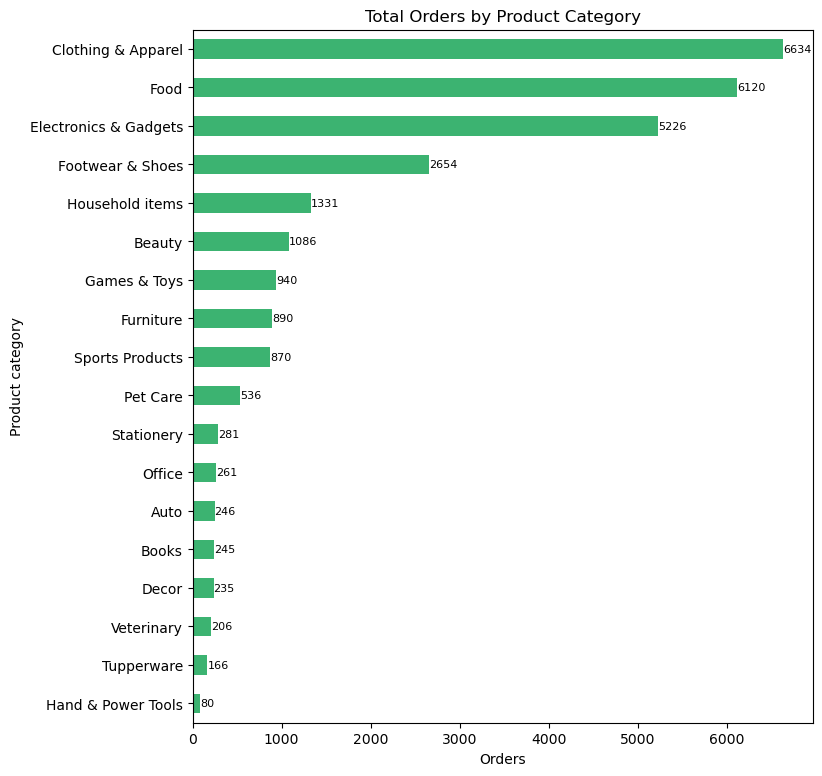

In [19]:
# Total orders by product category:
category_ordercnt= df.groupby('Product_Category')['Orders'].sum().sort_values(ascending=True)
print(category_ordercnt)
 
# visuals: 
category_ax = category_ordercnt.plot(kind='barh', figsize = ((8,9)), color = 'mediumseagreen')

category_ax.bar_label(category_ax.containers[0], fontsize=8, rotation=0) # data label

plt.title("Total Orders by Product Category", fontsize = 12)
plt.xlabel("Orders")
plt.ylabel("Product category")
plt.show()

# Revenue Analysis:

   Cust_Name    Amount
0   Vishakha  382782.0
1     Sudevi  287142.0
2    Vasudev  281034.0
3      Neola  275234.0
4  Alejandro  272517.0
5     Aastha  266961.0
6   Shreyshi  265603.0
7      Hazel  242343.0
8     Akshat  241349.0
9      Gopal  239147.0


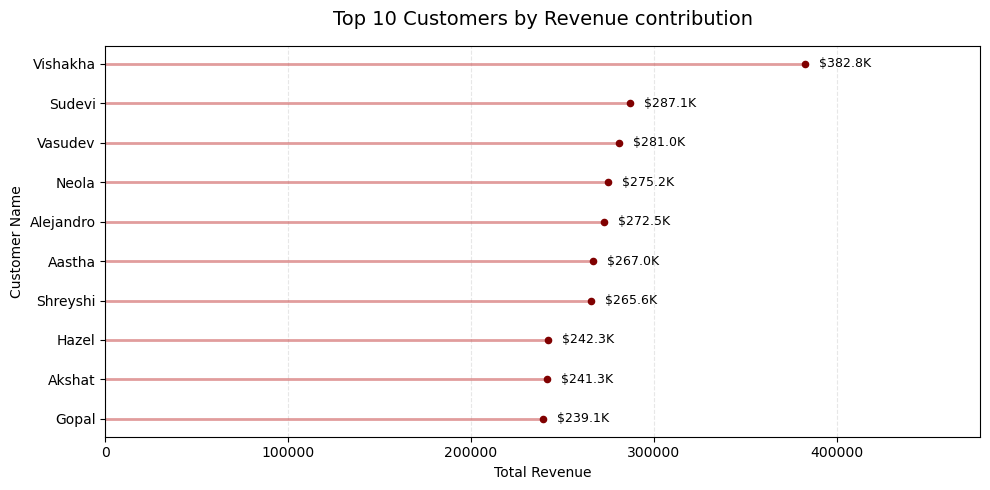

In [20]:
# Top 10 customers:
top_10_customers = (df.groupby('Cust_Name')['Amount'].sum().sort_values(ascending=False)
      .head(10).reset_index())
print(top_10_customers)

# Setup Plot
plt.figure(figsize=(10, 5))

# Lollipop lines
plt.hlines(y=top_10_customers['Cust_Name'],xmin=0,xmax=top_10_customers['Amount'],
    linewidth=2,colors='indianred',alpha=0.6)

# Dots (The "Heads")
plt.scatter(
    top_10_customers['Amount'],top_10_customers['Cust_Name'],color='maroon',s=20,zorder=3)

# Formatter function:
def format_currency(x):
    if x >= 1_000_000:
        return f"${x/1_000_000:.2f}M"
    elif x >= 1_000:
        return f"${x/1_000:.1f}K"
    else:
        return f"${x:.0f}"

# 3. Add Labels with Offset:
for x, y in zip(top_10_customers['Amount'], top_10_customers['Cust_Name']):
    plt.text(x + (top_10_customers['Amount'].max() * 0.02), y, format_currency(x), va='center', fontsize=9,)
    
plt.xlim(0, top_10_customers['Amount'].max() * 1.25)
plt.title("Top 10 Customers by Revenue contribution", fontsize=14, pad=15)
plt.xlabel("Total Revenue")
plt.ylabel("Customer Name")
plt.gca().invert_yaxis()

plt.grid(axis='x', linestyle='--', alpha=0.3) # Added light grid for readability
plt.tight_layout()
plt.show()

   Gender       Amount
0  Female  74430392.54
1    Male  31932183.22
Total sales: $106.4 million


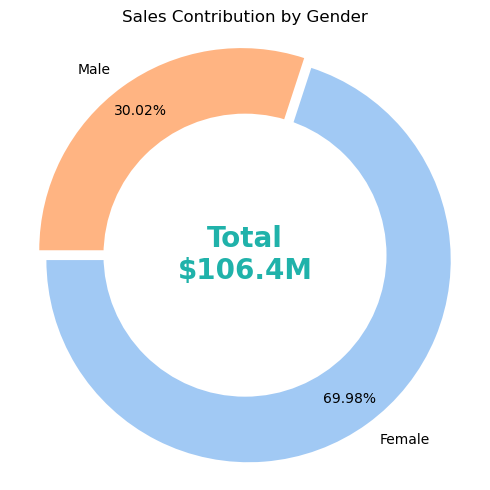

In [27]:
# Gender-wise sales:
gender_sales = df.groupby('Gender')['Amount'].sum().sort_values(ascending=False).reset_index().round(2)
print(gender_sales)
# Add the Total Sales in the center of the donut
total_val = gender_sales['Amount'].sum()
print(f"Total sales: ${humanize.intword(total_val)}")

# Seaborn color palette
colors = sns.color_palette('pastel')[0:len(gender_sales)]

# Create the Pie Chart
plt.figure(figsize=(5,5))
plt.pie(gender_sales['Amount'], 
    labels=gender_sales['Gender'], 
    autopct='%1.2f%%',
    startangle=180,
    colors=colors, 
    pctdistance=0.85,
    explode=[0.03] * len(gender_sales)
)

# 4. Turn it into a "Donut":
# We draw a white circle at the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Using our dynamic formatter logic from earlier
total_label = f'${total_val/1e6:.1f}M' if total_val >= 1e6 else f'${total_val/1e3:.0f}K'
plt.text(0, 0, f'Total\n{total_label}', ha='center', va='center', fontsize=20, fontweight='bold', color='lightseagreen')

plt.title("Sales Contribution by Gender", fontsize=12)
plt.axis('equal')
plt.tight_layout()
plt.show()

## Geographic Experience:

In [22]:
#-- Which state generated most revenue:
top_state = df.groupby('State')['Amount'].sum().nlargest(1)
state_name = top_state.index[0]
state_value = top_state.iloc[0]
print(f"Best Performing State: {state_name} with ${humanize.intword(int(state_value))}")

Best Performing State: Uttar Pradesh with $19.4 million


In [23]:
df.head()

,User_ID,Cust_Name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0


Top 10 state perfromance:
State
Uttar Pradesh       19.4 million
Maharashtra         14.4 million
Karnataka           13.5 million
Delhi               11.6 million
Madhya Pradesh       8.1 million
Andhra Pradesh       8.0 million
Himachal Pradesh     5.0 million
Haryana              4.2 million
Bihar                4.0 million
Gujarat              4.0 million
Name: Amount, dtype: object


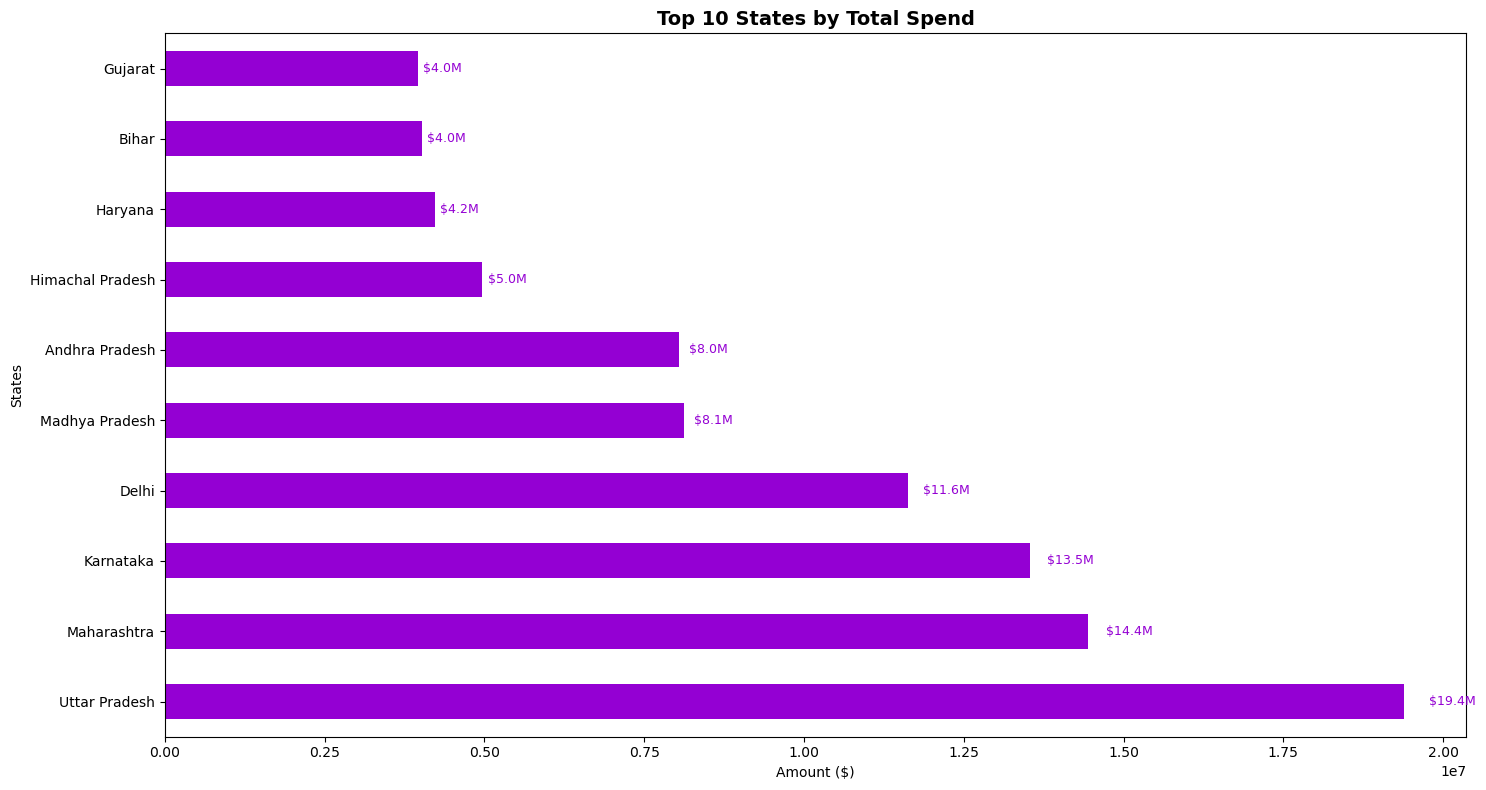

In [24]:
# removing white spaces:
df['State'] = df['State'].str.strip()

# Top 10 states by amount spend:
top_10_states = df.groupby('State')['Amount'].sum().sort_values(ascending=False).head(10).round(2)

# Apply humanize (currency format) to each row individually:
state_formatted_output = top_10_states.apply(lambda x: humanize.intword(int(x)))
print("Top 10 state perfromance:")
print(state_formatted_output)

# horizontal bar chart:
state_ax = top_10_states.plot(kind='barh', figsize=(15, 8), color='darkviolet')

# data labels:
for i, (state, v) in enumerate(top_10_states.items()):
    label = f"${v/1_000_000:.1f}M" if v >= 1_000_000 else f"${v/1_000:.1f}K"
    state_ax.text(v + (v * 0.02), i, label, va='center', fontsize=9, color='darkviolet')

# chart formatting:
plt.title('Top 10 States by Total Spend', fontsize=14, fontweight='bold')
plt.xlabel('Amount ($)')
plt.ylabel('States')
plt.tight_layout()
plt.show()

Zonal Contribution in Orders (%):
Zone
Central     37.99
Eastern      7.19
Northern    13.31
Southern    24.08
Western     17.43
Name: Orders, dtype: float64


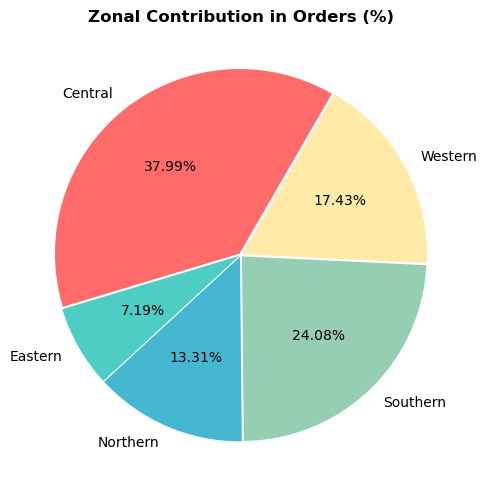

In [26]:
# Calculate zonal contribution (% of total orders)
zone_orders = df.groupby('Zone')['Orders'].sum()
zone_percentage = (zone_orders / zone_orders.sum() * 100).round(2)
print("Zonal Contribution in Orders (%):")
print(zone_percentage)

# Pie chart:
fig, zone_ax = plt.subplots(figsize=(5,5))

# colours in pie chart:
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

# Plotting pie chart:
wedges, texts, autotexts = zone_ax.pie(
    zone_percentage,
    labels=zone_percentage.index,
    autopct='%1.2f%%',
    startangle=60,
    colors=colors[:len(zone_percentage)],
    explode=[0.01] * len(zone_percentage),
    shadow=False,
    textprops={'fontsize': 10}
)

# Style percentage labels:
for autotext in autotexts:
    autotext.set_color('Black')
    autotext.set_fontsize(10)

# chart formatting:
zone_ax.set_title('Zonal Contribution in Orders (%)', fontsize=12, fontweight='bold')
zone_ax.axis('equal')
plt.tight_layout()
plt.show()

In [28]:
df.head()

,User_ID,Cust_Name,Product_ID,Gender,Age_Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,Female,26-35,28,Unmarried,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,Female,26-35,35,Married,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,Female,26-35,35,Married,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,Male,0-17,16,Unmarried,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,Male,26-35,28,Married,Gujarat,Western,Food Processing,Auto,2,23877.0
